# Lab 11: SNA Continued
## Sam Bacon - March 24, 2021
### Social Network Analysis with Directed Graphs

In [ ]:
# Install packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from operator import itemgetter

In [ ]:
# read in data
schools = pd.read_csv('school_peers.csv')
schools.head(5)

,orgname,selected_peers_concat
0,Abilene Christian University,Alaska Pacific University|Azusa Pacific Univer...
1,Abraham Baldwin Agricultural College,Gordon College|Middle Georgia College|Iowa Lak...
2,Adams State College,Arizona State University|Northern Arizona Univ...
3,Adelphi University,University of San Diego|University of San Fran...
4,Adirondack Community College,Cayuga County Community College|Clinton Commun...


In [ ]:
# create lists

# institution
institutions = []
for i, row in schools.iterrows():
    institution.insert(2,row['orgname'])

# peers
edges = []
for index, row in schools.iterrows():
  curr_school = row['orgname']
  peers = row['selected_peers_concat'].split('|')

  for peer in peers:
    edges.append((curr_school, peer))

In [ ]:
# directed graph
G = nx.DiGraph()

G.add_nodes_from(institutions)
G.add_edges_from(edges)

In [ ]:
# info

# manually
print('Graph information')
print()
print('Node count:', len(list(G.nodes)))
print('Edge count:', len(list(G.edges)))

in_vals = [v for _, v in G.in_degree(G.nodes())]
average_in = sum(in_vals) / len(in_vals)
print("Avg. in-degree:", average_in)

out_vals = [v for _, v in G.out_degree(G.nodes())]
average_out = sum(out_vals) / len(out_vals)
print("Avg. out-degree:", average_out)

# using code
print()
print(nx.info(G))


Graph information

Node count: 3320
Edge count: 37850
Avg. in-degree: 11.400602409638553
Avg. out-degree: 11.400602409638553

Name: 
Type: DiGraph
Number of nodes: 3320
Number of edges: 37850
Average in degree:  11.4006
Average out degree:  11.4006


In [ ]:
# density

# networkx
density = nx.density(G)
print("Network density:", density)

# manual
print("Manual calculation:", G.number_of_edges() / (G.number_of_nodes()*(G.number_of_nodes()-1)))

print()
print("The densities match.")

Network density: 0.0034349510122442164
Manual calculation: 0.0034349510122442164

The densities match.


The density of this directed graph is 0.0034. Clearly, this graph is pretty sparse. However, when we consider what the network represents, it makes sense that the density value is low. Each edge indicates that a university considers another university as its peer. The average in and out degrees were extremely low compared to the amount of universities listed in the dataset (3320). Therefore, we would expect the network density to be low. 

In [ ]:
# other specs

# in_degree 
in_degree_dict = dict(G.in_degree(G.nodes()))
nx.set_node_attributes(G, in_degree_dict, 'in_degree')

# out_degree 
out_degree_dict = dict(G.out_degree(G.nodes()))
nx.set_node_attributes(G, out_degree_dict, 'out_degree')

# betweenness centrality
betweenness_dict = nx.betweenness_centrality(G) 
nx.set_node_attributes(G, betweenness_dict, 'betweenness')

# eigenvector centrality
eigenvector_dict = nx.eigenvector_centrality(G) 
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')

In [ ]:
# three schools
print('Elon University:')
print(G.nodes['Elon University'])
print()

print('The University of Texas at Austin:')
print(G.nodes['The University of Texas at Austin'])
print()

print('James Madison University:')
print(G.nodes['James Madison University'])

Elon University:
{'in_degree': 55, 'out_degree': 11, 'betweenness': 0.0004957983905059717, 'eigenvector': 0.00504641772313647}

The University of Texas at Austin:
{'in_degree': 40, 'out_degree': 11, 'betweenness': 1.8863290510346975e-05, 'eigenvector': 0.060004945994486}

James Madison University:
{'in_degree': 26, 'out_degree': 30, 'betweenness': 0.0009410132353514753, 'eigenvector': 0.000947085337574634}


I chose to examine the values for Elon, The University of Texas, and JMU. Regarding in-degree, Elon returned the highest value of the three (55), which was a surprise to me. This indicates that many universities think of Elon when they consider schools with which they share similarities. Considering that Elon is significantly smaller than the other two schools in terms of student population, part of me expected Elon to return a smaller in-degree than the others.  Out of the three schools, JMU has the highest out-degree, suggesting that JMU sees itself as having more 'peers' than Elon or Texas. JMU has the highest betweenness centrality, meaning that more shortest paths go through JMU than the other schools. This may be because JMU falls between Elon and Texas in terms of size, so paths from small to large or large to small may go through JMU. Finally, Texas returns the highest eigenvector centrality, meaning that it is more connected to other highly-conected schools than Elon or JMU. Both of these statements seem reasonable.

In [ ]:
sorted_in = sorted(in_degree_dict.items(), key=itemgetter(1), reverse=True)
sorted_out = sorted(out_degree_dict.items(), key=itemgetter(1), reverse=True)
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)
sorted_eigenvector = sorted(eigenvector_dict.items(), key=itemgetter(1), reverse=True)


print("Top 10 nodes by in-degree:")
for b in sorted_in[:10]:
    print(b)
print()

print("Top 10 nodes by out-degree:")
for b in sorted_out[:10]:
    print(b)
print()

print("Top 10 nodes by betweenness centrality:")
for b in sorted_betweenness[:10]:
    print(b)
print()

print("Top 10 nodes by eigenvector centrality:")
for b in sorted_eigenvector[:10]:
    print(b)



Top 10 nodes by in-degree:
('Capella University', 77)
('Wheaton College', 72)
('Grand Canyon University', 68)
('Ashford University', 67)
('Daniel Webster College', 64)
('Strayer University-District of Columbia', 63)
('DeVry University-Illinois', 62)
('DeVry University-Florida', 62)
('Carleton College', 62)
('American InterContinental University-Online', 62)

Top 10 nodes by out-degree:
('Iowa State University', 100)
('Indiana Wesleyan University', 99)
('Rio Salado College', 99)
('The University of Tampa', 99)
('Lander University', 99)
('Bainbridge College', 98)
('Bowdoin College', 98)
('Trevecca Nazarene University', 98)
('Central Wyoming College', 98)
('Guam Community College', 98)

Top 10 nodes by betweenness centrality:
('Southwestern College', 0.031709805987854105)
('Community College of Philadelphia', 0.027304289227219183)
('Fort Valley State University', 0.020882889965158694)
('Bethany College', 0.01928518317566953)
('Rutgers University-New Brunswick', 0.017111769769329106)
('Uni

The lists of tops schools for these four values are extremely different. This is likely due to a variety of reasons, including but not limited to, size, student population, campus location, degree programs offered, etc. Within these four lists, there is plenty of variety in terms of these factors. The only pattern that I notice is that the top 10 schools in terms of eigenvector centrality appear to be smaller colleges, and I am not quite sure why. However, it is clear that none of thee metrics are better suited for predicting school quality, especially because 'quality' is such a subjective term.

In [ ]:
# Elon
elon_neighbors = []
elon_neighbors.append("Elon University")

for e in G.edges.keys():
  if e[0] == 'Elon University':
    elon_neighbors.append(e[1])
  elif e[1] == 'Elon University':
    elon_neighbors.append(e[0])

H = G.subgraph(elon_neighbors)
print(nx.info(H))

Name: 
Type: DiGraph
Number of nodes: 63
Number of edges: 388
Average in degree:   6.1587
Average out degree:   6.1587


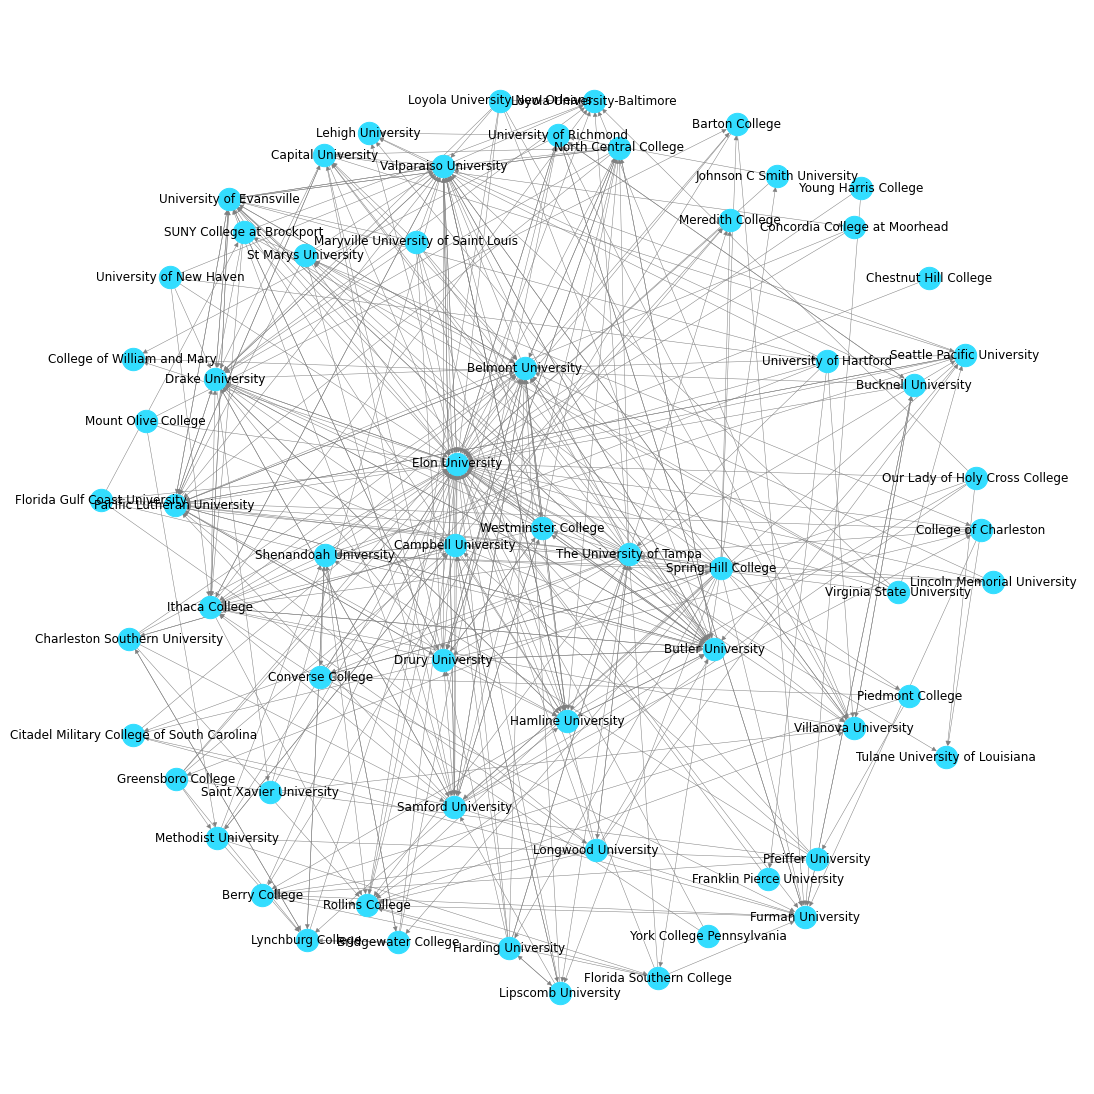

In [ ]:
# visualization

plt.figure(figsize=(15,15))
pos = nx.spring_layout(H, k=1.8) 
nx.draw(H, pos=pos, with_labels=True,
        node_color='#33ddff', node_size=500,
        edge_color='grey', width=0.5)
plt.show()